In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import kagglehub
import pathlib
import random
import os

Model learning using created dataset

In [ ]:
#### UPLOADED TO KAGGLE CUSTOM DATASET | LINK: https://www.kaggle.com/datasets/denisdovgodko/peony-vs-rose
peony_vs_rose_dataset_url = kagglehub.dataset_download("denisdovgodko/peony-vs-rose")
#### UPLOADED TO KAGGLE CUSTOM DATASET | LINK: https://www.kaggle.com/datasets/denisdovgodko/peony-vs-rose

data_dir = pathlib.Path(f'{peony_vs_rose_dataset_url}/peony-vs-rose/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = f"{peony_vs_rose_dataset_url}/peony-vs-rose/train/"
test_dir  = f"{peony_vs_rose_dataset_url}/peony-vs-rose/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation="sigmoid") 
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


c:\Users\dendo\OneDrive\Рабочий стол\МІТ\МІТ-31\Інтелектуальний аналіз данних\repo\lab0env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dendo\OneDrive\Рабочий стол\МІТ\МІТ-31\Інтелектуальний аналіз данних\repo\lab0env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.5922 - loss: 0.7274 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


C:\Users\dendo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4672 - loss: 0.6993 - val_accuracy: 0.5500 - val_loss: 0.6830
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.4683 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.5401 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7415 - loss: 0.6753 - val_accuracy: 0.7500 - val_loss: 0.6733
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8801 - loss: 0.6511 - val_accuracy: 0.6000 - val_loss: 0.6484
Epoch 12/50
4/4 ━━━

Classify rose in dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Image shape: (500, 500, 3)


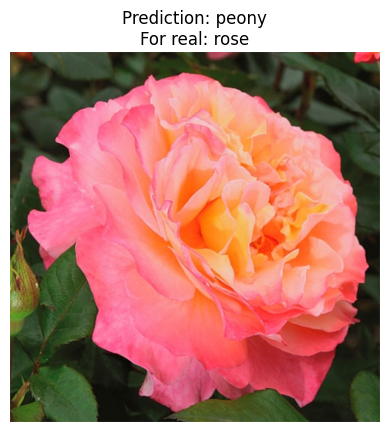

In [6]:
def flower_predict(image_class):
    random_image = random.sample(os.listdir(f"{peony_vs_rose_dataset_url}/peony-vs-rose/test/{image_class}"), 1)

    img_mpimg = mpimg.imread(f"{peony_vs_rose_dataset_url}/peony-vs-rose/test/{image_class}/{random_image[0]}")

    img = tf.io.read_file(f"{peony_vs_rose_dataset_url}/peony-vs-rose/test/{image_class}/{random_image[0]}")
    img = tf.image.decode_image(img, channels=3)
    new_size = [224, 224] 
    img = tf.image.resize(img, size = new_size)
    img = img/255.
    img = tf.expand_dims(img, axis=0)

    img_prediction = model_1.predict(img)
    pred_class = class_names[int(tf.round(img_prediction)[0][0])]

    plt.imshow(img_mpimg)
    plt.title(f"Prediction: {pred_class}\nFor real: {image_class}")
    plt.axis(False)
    print(f"Image shape: {img_mpimg.shape}")
flower_predict("rose")


Classify peony in dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image shape: (300, 300, 3)


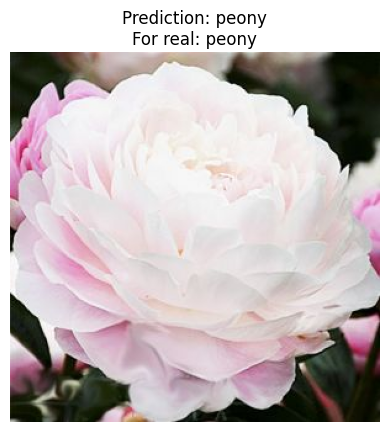

In [11]:
flower_predict("peony")

Efficiency visualization

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

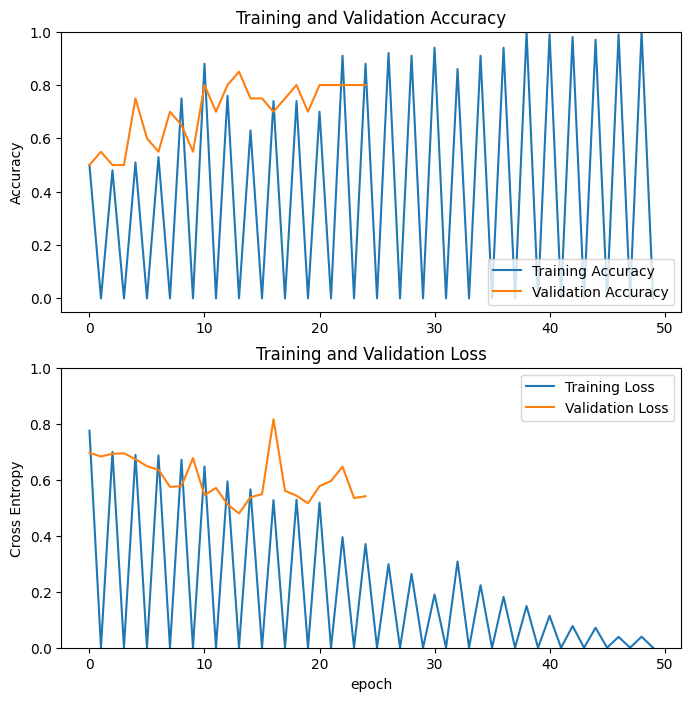

In [14]:
model_1.summary()

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']

epochs = range(len(history_1.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()